# Fancy indexing

So we've looked at:

- simple indices (e.g `arr[0]`)
- slices (e.g `arr[:5]`)
- Boolean masks (e.g `arr[arr > 0]`)

Fancy indexing builds upon simple indexing and importantly allows us to modify and access __complicated subsests__ of an array's values

Conceptually simple: it means passing an array of indices to access multiple array elements at once.

In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
# we could access three different elements as follows:
[x[3], x[7], x[2]]  #create list of position

[71, 86, 14]

In [4]:
# or do so with a list of array indices for same result
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*:

In [5]:
ind = np.array([[3, 7],
                [4, 5]])        #passing as two dimensional array 
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
# Like with standard indexing, the first index refers to the row, and the second to the column:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is `X[0, 2]`, the second is `X[1, 1]`, and the third is `X[2, 3]`

In [2]:
# broadcasting rules apply when combining a column and row vector as indices
X[row[:, np.newaxis], col]

NameError: name 'X' is not defined

## Combined Indexing

Fancy indexing gets even fancier when combining with the other indexing schemes:

In [11]:
# combining simple and fancy
print(X)
X[2, [2,0,1]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([10,  8,  9])

In [12]:
# combining slicing and fancy
X[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [8]:
# and finally combining masking with fancy
mask = np.array([1, 0, 1, 0], dtype=bool)
print(mask)
print(row)
X[row[:, np.newaxis], mask]

[ True False  True False]
[0 1 2]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points

Recap: we can use fancy indexing to select rows from a matrix easily.

In [12]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

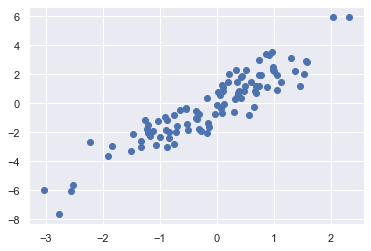

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

# plot values from first column on X and second column on Y
plt.scatter(X[:, 0], X[:, 1]);

Let's select 20 random point using fancy indexing:

- criteria: 20 random indices with no repeats

In [14]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([38, 77, 20, 93, 46,  7, 91, 16, 98, 30, 10, 63, 96, 43, 82, 51, 55,
       23, 69, 70])

In [15]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

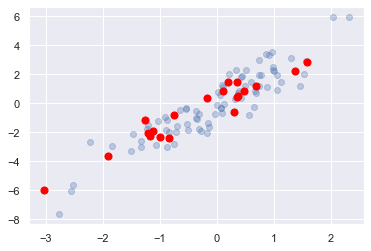

In [18]:
# using the fancy indexing, let's plot circles over the points on the graph
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=50);

Why select a subset of data?

Often used for training test splitting for validation of statistical models.

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array:

In [29]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [30]:
# any assignment operator can be used for this
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [19]:
# careful with repeated indices
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
# what's the problem with the output?
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [34]:
# use at to solve this behaviour
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Example: Binning Data

We can use the above ideas to create a histogram by hand efficiently:

- e.g from 1,000 values, where might they fall within an array of bins?

In [35]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

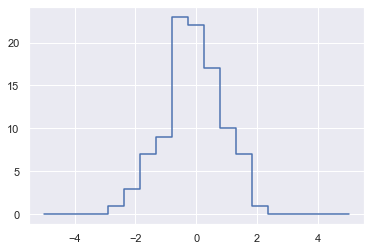

In [43]:
# plot the results
plt.step(bins, counts)
plt.show()

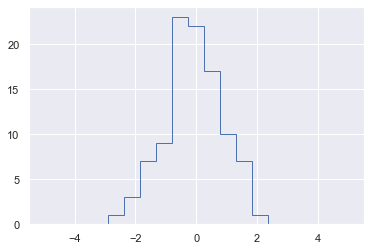

In [46]:
#alternatively
plt.hist(x, bins, histtype='step')
plt.show()

In [47]:
#which is quicker?
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
27.3 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom routine:
14.7 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Wait, our own algorithm is quicker than NumPy?

Why? Lots going on in the histogram function...

Really it's designed for better performance on far more data:

In [48]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
57.5 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
119 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Algorithmic efficiency is never an easy question to answer.

What might work on a large dataset efficiently, may be inefficient on a small dataset, and vice-versa.

Important thing to takeaway from what you're learning is the convenience of some of these methods and when to use them!